<a href="https://colab.research.google.com/github/nikhilcss97/Keras_practise/blob/master/Salt_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Under Construction 


!pip install kaggle
!pip install imageio
!pip install ipywidgets

    100% |████████████████████████████████| 61kB 4.0MB/s 
    100% |████████████████████████████████| 235kB 6.4MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify
    100% |████████████████████████████████| 3.3MB 9.4MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio
    100% |████████████████████████████████| 112kB 4.3MB/s 
    100% |████████████████████████████████| 2.2MB 8.8MB/s 


In [4]:
import os
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import keras
from keras.utils import Sequence

%matplotlib inline

Using TensorFlow backend.


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikhilcss97","key":"6765ed671692641a5df95996c45abae8"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
ls -lha

total 20K
drwxr-xr-x 1 root root 4.0K Nov 10 18:46 ./
drwxr-xr-x 1 root root 4.0K Nov 10 18:45 ../
drwxr-xr-x 4 root root 4.0K Nov  7 19:54 .config/
-rw-r--r-- 1 root root   67 Nov 10 18:46 kaggle.json
drwxr-xr-x 2 root root 4.0K Nov  7 20:08 sample_data/


In [8]:
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 60.6MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 76.7MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 128MB/s]
 96% 157M/163M [00:02<00:00, 65.9MB/s]
100% 163M/163M [00:02<00:00, 75.2MB/s]
 74% 28.0M/37.9M [00:00<00:00, 28.7MB/s]
100% 37.9M/37.9M [00:00<00:00, 67.0MB/s]


In [9]:
#Unzip the dataset
!unzip train.zip

Archive:  train.zip
   creating: images/
   creating: masks/
  inflating: images/8d08955cdf.png   
  inflating: images/e045664b46.png   
  inflating: images/4989c6509e.png   
  inflating: images/fff4eb4941.png   
  inflating: images/3a310860a3.png   
  inflating: images/7a696bb878.png   
  inflating: images/8d3ee9356b.png   
  inflating: images/213e0a9f7b.png   
  inflating: images/78f17697f2.png   
  inflating: images/bd20d18369.png   
  inflating: images/de08c5a3b7.png   
  inflating: images/f06ef6c8b7.png   
  inflating: images/b2d02516e1.png   
  inflating: images/5edb37f5a8.png   
  inflating: images/b1f0e104f5.png   
  inflating: images/40e8e14e60.png   
  inflating: images/6e1444d88d.png   
  inflating: images/f342603c76.png   
  inflating: images/7ba58ee1be.png   
  inflating: images/14a89a1840.png   
  inflating: images/4319885cf1.png   
  inflating: images/bb697642ae.png   
  inflating: images/d4acb30303.png   
  inflating: images/057eae4f34.png   
  inflating: images/9f0c9f3

In [0]:
#Create a class to represent the dataset(basic data preprocessing)

class TGSSaltDataset(Sequence):
  def __init__(self, root_path, file_list):
    self.root_path= root_path
    self.file_list= file_list
    
    
  def __len__(self):
    """
    Returns the number of files
    
    """
    return len(self.file_list)
  
  def __getitem__(self, index):
    """
    Returns an image so that we can apply preprocessing on it
    Params:
    index - An index value corresponding to the file that we want
    
    """
    file_id= self.file_list[index]
    image_folder= os.path.join(self.root_path, 'images')
    image_path= os.path.join(image_folder, file_id + '.png')
    
    
    mask_folder= os.path.join(self.root_path, 'masks')
    mask_path= os.path.join(mask_folder, file_id + '.png')
    
    image= np.array(imageio.imread(image_path), dtype= np.uint8)
    mask= np.array(imageio.imread(mask_path), dtype= np.uint8)
    
    return image, mask

In [0]:
train_mask= pd.read_csv('train.csv')

depths_csv= pd.read_csv('depths.csv')


train_path= '/content/'

file_list= list(train_mask['id'].values)
dataset= TGSSaltDataset(train_path, file_list)

In [0]:
#Function to visualize the images

def plot2x2images(image, mask):
  f, axarr= plt.subplots(1, 2)
  axarr[0].imshow(image)
  axarr[1].imshow(mask)
  axarr[0].grid()
  axarr[1].grid()
  axarr[0].set_title('Image')
  axarr[1].set_title('Mask')
  
  
  

(101, 101, 3)
(101, 101, 3)
(101, 101, 3)
(101, 101, 3)
(101, 101, 3)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

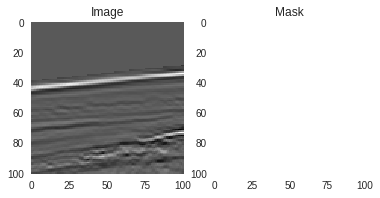

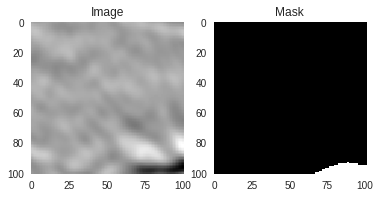

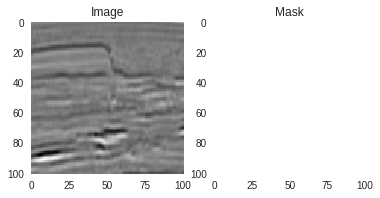

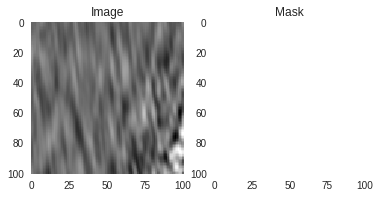

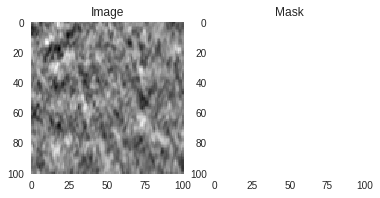

In [16]:
for i in range(5):
  
  image, mask= dataset[np.random.randint(0, 100)]
  plot2x2images(image, mask)
  
  print(image.shape)
  


(68,)


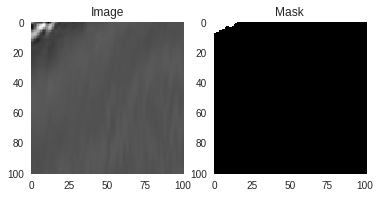

In [34]:
  
sample, mask= dataset[2]
print(mask[mask == 0].shape)

plot2x2images(sample, mask)

Text(0.5,1,'Depth Distribution')

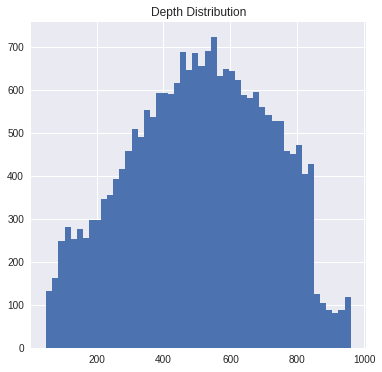

In [21]:
#Plotting the distribution of depths

plt.figure(figsize= (6, 6))
plt.hist(depths_csv['z'], bins= 50)
plt.title('Depth Distribution')

In [1]:
int("a2w3")

ValueError: ignored